## Project - Give Me Some Credit

-- Case study

<br>
<b>Motivations:</b>

A financial institute wants to estimate the risk of a new customers defaulting on a loan and/or being significantly past due on a loan payment in the next two years, by providing the data of their customers.
<br>
The goal of this project is to predict the probability of credit default based on the customer's characteristics and payment history by using credit scoring models.
 
<b>Data:</b>

From kaggle competition: https://www.kaggle.com/c/GiveMeSomeCredit/data

150000 samples with 10 features:


- <b>age:</b> Age of borrower in years
- <b>NumberOfDependents:</b> Number of dependents in family excluding themselves (spouse, children etc.)
- <b>MonthlyIncome:</b> Monthly income
- <b>DebtRatio:</b> Monthly debt payments, alimony, living costs divided by monthy gross income
- <b>RevolvingUtilizationOfUnsecuredLines:</b> Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- <b>NumberOfOpenCreditLinesAndLoans:</b> Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- <b>NumberRealEstateLoansOrLines:</b> Number of mortgage and real estate loans including home equity lines of credit
- <b>NumberOfTime30-59DaysPastDueNotWorse:</b> Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- <b>NumberOfTime60-89DaysPastDueNotWorse:</b> Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- <b>NumberOfTimes90DaysLate:</b> Number of times borrower has been 90 days or more past due.

Two classes: 1-default and 0-non-default
- <b>SeriousDlqin2yrs:</b> Person experienced 90 days past due delinquency or worse

### Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import time
from IPython.display import display

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('cs-training.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
df.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

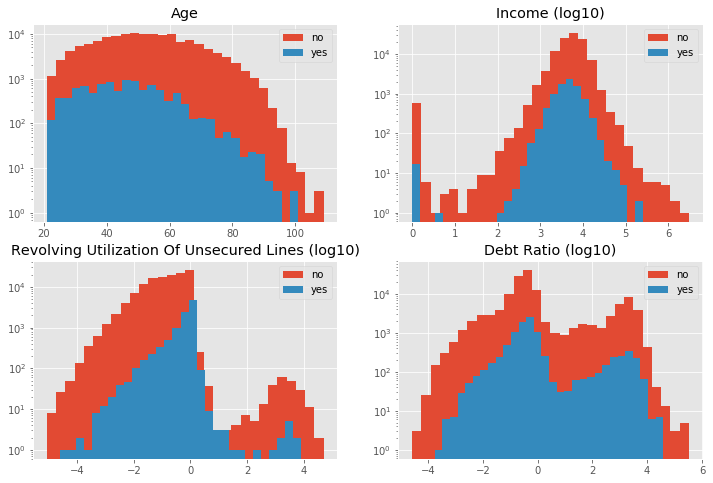

In [6]:
## features with continuous values: Age, income, Revolving Utilization Of Unsecured Lines, Debt Ratio

plt.figure(figsize=(12,8))

no = df.groupby(["SeriousDlqin2yrs"]).get_group(0).query('age > 0')["age"]
yes= df.groupby(["SeriousDlqin2yrs"]).get_group(1)["age"]
plt.subplot(221)
plt.hist(no, bins=30, label='no', log=True)
plt.hist(yes, bins=30, label='yes', log=True)
plt.legend(loc='upper right')
plt.title("Age")

plt.subplot(222)
no = df.groupby(["SeriousDlqin2yrs"]).get_group(0).query('MonthlyIncome > 0')["MonthlyIncome"].dropna()
yes= df.groupby(["SeriousDlqin2yrs"]).get_group(1).query('MonthlyIncome > 0')["MonthlyIncome"].dropna()
plt.hist(np.log10(no), bins=30, label='no', log=True)
plt.hist(np.log10(yes), bins=30, label='yes', log=True)
plt.legend(loc='upper right')
plt.title("Income (log10)")

plt.subplot(223)
no = df.groupby(["SeriousDlqin2yrs"]).get_group(0).query('RevolvingUtilizationOfUnsecuredLines > 0')["RevolvingUtilizationOfUnsecuredLines"]
yes= df.groupby(["SeriousDlqin2yrs"]).get_group(1).query('RevolvingUtilizationOfUnsecuredLines > 0')["RevolvingUtilizationOfUnsecuredLines"]
plt.hist(np.log10(no), bins=30, label='no', log=True)
plt.hist(np.log10(yes), bins=30, label='yes', log=True)
plt.legend(loc='upper right')
plt.title("Revolving Utilization Of Unsecured Lines (log10)")

plt.subplot(224)
no = df.groupby(["SeriousDlqin2yrs"]).get_group(0).query('DebtRatio > 0')["DebtRatio"]
yes= df.groupby(["SeriousDlqin2yrs"]).get_group(1).query('DebtRatio > 0')["DebtRatio"]
plt.hist(np.log10(no), bins=30, label='no', log=True)
plt.hist(np.log10(yes), bins=30, label='yes', log=True)
plt.legend(loc='upper right')
plt.title("Debt Ratio (log10)")

plt.show()


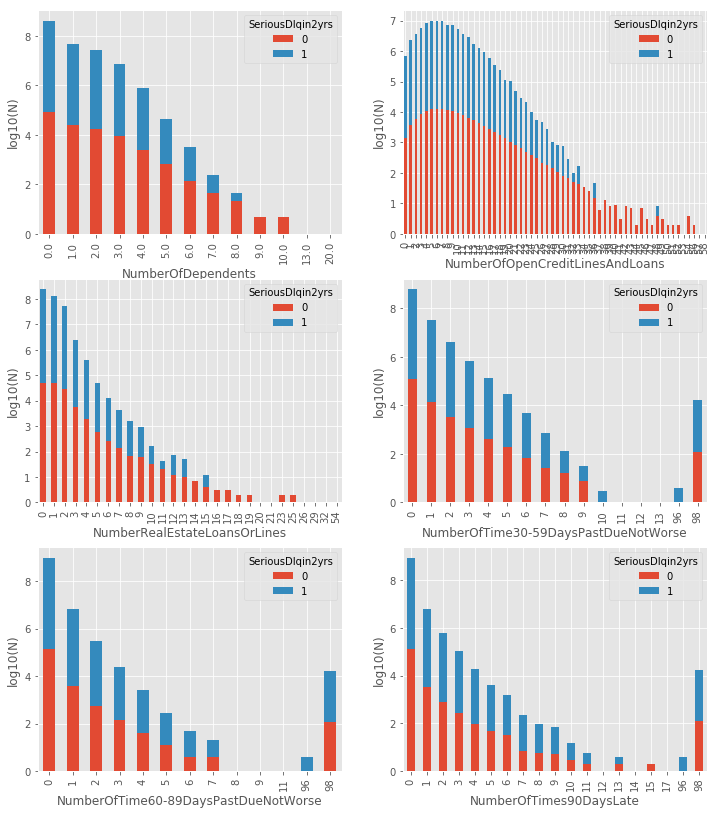

In [7]:
## features with catelogical values

fig, ax = plt.subplots(3,2, figsize=(12,14))

dep = df.groupby(["SeriousDlqin2yrs"])["NumberOfDependents"].value_counts().unstack().T
np.log10(dep).plot(kind='bar', stacked=True, ax=ax[0,0]).set_ylabel('log10(N)')

oclal = df.groupby(["SeriousDlqin2yrs"])["NumberOfOpenCreditLinesAndLoans"].value_counts().unstack().T
np.log10(oclal).plot(kind='bar', stacked=True, ax=ax[0,1]).set_ylabel('log10(N)')

relol = df.groupby(["SeriousDlqin2yrs"])["NumberRealEstateLoansOrLines"].value_counts().unstack().T
np.log10(relol).plot(kind='bar', stacked=True, ax=ax[1,0]).set_ylabel('log10(N)')

pd_30 = df.groupby(["SeriousDlqin2yrs"])["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().unstack().T
np.log10(pd_30).plot(kind='bar', stacked=True, ax=ax[1,1]).set_ylabel('log10(N)')

pd_60 = df.groupby(["SeriousDlqin2yrs"])["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().unstack().T
np.log10(pd_60).plot(kind='bar', stacked=True, ax=ax[2,0]).set_ylabel('log10(N)')

pd_90 = df.groupby(["SeriousDlqin2yrs"])["NumberOfTimes90DaysLate"].value_counts().unstack().T
np.log10(pd_90).plot(kind='bar', stacked=True, ax=ax[2,1]).set_ylabel('log10(N)')

plt.show()

In [8]:
print"Number of zero age:", df[df["age"]==0]["age"].count()
print"Number of zero income:", df[df["MonthlyIncome"]==0]["MonthlyIncome"].count()
print"Number of low income (<1000):", df[df["MonthlyIncome"]<=1000]["MonthlyIncome"].count()
print"Number of large amount of defaults after 30 days (>90):", df[df["NumberOfTime30-59DaysPastDueNotWorse"]>90]["NumberOfTime30-59DaysPastDueNotWorse"].count()
print"Number of large amount of defaults after 60 days (>90):", df[df["NumberOfTime60-89DaysPastDueNotWorse"]>90]["NumberOfTime30-59DaysPastDueNotWorse"].count()
print"Number of large amount of defaults in 30 days (>90):", df[df["NumberOfTimes90DaysLate"]>90]["NumberOfTime30-59DaysPastDueNotWorse"].count()

Number of zero age: 1
Number of zero income: 1634
Number of low income (<1000): 4795
Number of large amount of defaults after 30 days (>90): 269
Number of large amount of defaults after 60 days (>90): 269
Number of large amount of defaults in 30 days (>90): 269


<b>Summary</b>

- There are some missing data and maybe error data in the dataset <br> 
missing data: (income, 29731), (NumberOfDependents, 3924)<br>
error data: (age=0, 1), (income=0: 1634), (low income < 1000: 4795), (large number of past due > 90: 269 * 3)<br>
We should do data cleaning and feature engineering in the following.
- Imbalenced dataset: 0:139974; 1:10026
- Features with wide range of values, plotted in logarithmic scale, and should be rescale or transform to categorical data.

### Modeling with original features

Several possible routes:
1. Deal with imbalanced dataset, resampling data, generate synthetic samples, penal, penalized models etc.
2. Ensemble tree based methods (random forest, gradient boosting), decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes. And ensemble trees often result in dramatic improvements in prediction accuracy, at the expense of some loss interpretation.
3. Ensemble with ensemble models, combining different models in order to obtain a more powerful learner.

Why gradient boosting:
1. This method  is incredibly effective in practice, the popular implementation (XGBoost) is used in a number of winning Kaggle solutions. 
2. As metionded above, it is a tree based method, perform well on imbalanced dataset and missing data.
3. XGBoost is highly efficient, flexible, runing on distributed environment.

In [10]:
## initial model with empirical parameters 

from sklearn.model_selection import train_test_split

label  = df.SeriousDlqin2yrs
data   = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label)
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)
ratio = float(np.sum(label==1)) / np.sum(label==0)

xgbc = xgb.XGBClassifier(learning_rate=0.01, 
                    n_estimators=1000, 
                    objective='binary:logistic',
                    subsample=0.5,
                    max_depth=4, 
                    scale_pos_weight=ratio,
                    n_jobs=8)

start = time.time()
bst = xgbc.fit(X_train, y_train)
elapsed = time.time() - start
print "Total time:", elapsed/60, "mins"

Total time: 1.86748565038 mins


In [24]:
# AUC
from sklearn.metrics import roc_auc_score

y_pred_p = bst.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_p)
print"AUC:", auc

AUC: 0.8698674549561085


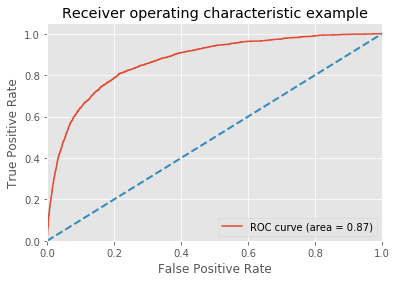

In [40]:
# Plot roc

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_p)
plt.figure()
lw = 2
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


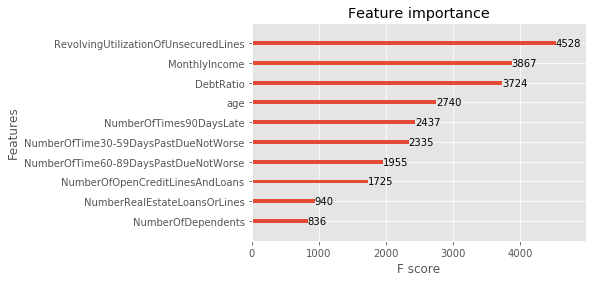

In [20]:
# Plot feature importance
xgb.plot_importance(bst)

('cv: ', 0)
('cv: ', 1)
('cv: ', 2)
('cv: ', 3)
('cv: ', 4)


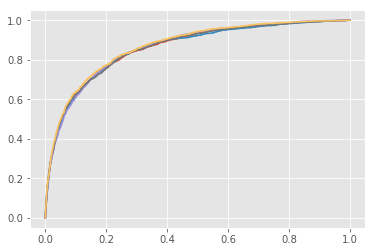

In [39]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

xgbc = xgb.XGBClassifier(learning_rate=0.01, 
                    n_estimators=1000, 
                    objective='binary:logistic',
                    subsample=0.5,
                    max_depth=3, 
                    scale_pos_weight=ratio,
                    n_jobs=-1)
i = 0

X, y = data.values, label.values
for train, test in cv.split(X, y):
    print("cv: ", i)
    probas_ = xgbc.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, _ = roc_curve(y[test], probas_[:,1])
    roc_auc = roc_auc_score(y[test], probas_[:,1])
    plt.plot(fpr, tpr, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

In [6]:
## 5-folds cross validation

label  = df.SeriousDlqin2yrs
data   = df.iloc[:,1:]
dtrain = xgb.DMatrix(data, label=label, nthread=8)
param = {'max_depth':3,
         'gamma':0.1,
         'eta':0.005, 
         'subsample':0.5,
         'objective':'binary:logistic'}

ratio = float(np.sum(label==0)) / np.sum(label==1)
param['scale_pos_weight'] = ratio

num_round = 2000

start = time.time()
results = xgb.cv(param, dtrain, num_round, 
                 nfold=5, metrics='auc', 
                 seed=0, verbose_eval=400)
elapsed = time.time() - start
print elapsed/60, "mins"

[0]	train-auc:0.819776+0.001246	test-auc:0.819364+0.00501778
[400]	train-auc:0.857446+0.00108827	test-auc:0.855676+0.00511326
[800]	train-auc:0.864073+0.00129188	test-auc:0.861318+0.00512993
[1200]	train-auc:0.86782+0.00130711	test-auc:0.863931+0.00515858
[1600]	train-auc:0.870187+0.00131801	test-auc:0.865092+0.00530749
[1999]	train-auc:0.87196+0.00133151	test-auc:0.865676+0.00534726
4.75060353279 mins


In [ ]:
# auc vs. number_round

fig, ax = plt.subplots(1,1)
results[["train-auc-mean", "test-auc-mean"]].plot(ax=ax)

In [10]:
## hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import dask_searchcv as dcv
from dask.diagnostics import ProgressBar

label  = df.SeriousDlqin2yrs
data   = df.iloc[:,1:]
params_grid = {
        'subsample': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'max_depth': [3, 4, 5]
        }

xgbc = XGBClassifier(learning_rate=0.01, 
                    n_estimators=2000, 
                    objective='binary:logistic')

skf = StratifiedKFold(n_splits=4, 
                      shuffle=True,
                      random_state=99)

random_search = dcv.RandomizedSearchCV(xgbc, 
                                   param_distributions=params_grid, 
                                   n_iter=10, 
                                   scoring='roc_auc', 
                                   cv=skf.split(data,label),
                                   n_jobs=8,
                                   #verbose=20,
                                   random_state=99)

start = time.time()
with ProgressBar():
    random_search.fit(data, label)
elapsed = time.time() - start
print "total time:", elapsed/60, "mins"

[########################################] | 100% Completed | 22min  1.9s
total time: 22.0366055806 mins


In [11]:
# Results
pd.DataFrame(random_search.cv_results_)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklear

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_max_depth,param_subsample,params,rank_test_score,split0_test_score,...,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,329.276468,8.509332,0.866549,0.892182,0.5,5,0.7,"{u'subsample': 0.7, u'colsample_bytree': 0.5, ...",4,0.861079,...,0.868585,0.891533,0.866415,0.892033,0.870117,0.891504,0.758684,0.181561,0.003421,0.000877
1,330.371134,6.016906,0.866736,0.883166,0.7,4,0.5,"{u'subsample': 0.5, u'colsample_bytree': 0.7, ...",1,0.861292,...,0.868464,0.882423,0.866527,0.883063,0.870661,0.882284,1.285334,0.160908,0.003467,0.001041
2,209.160507,7.817851,0.866386,0.891752,0.5,5,0.5,"{u'subsample': 0.5, u'colsample_bytree': 0.5, ...",7,0.860579,...,0.868543,0.890942,0.866340,0.891508,0.870083,0.891107,0.831173,0.138203,0.003607,0.001003
3,148.048440,5.593739,0.866709,0.881292,0.5,4,0.3,"{u'subsample': 0.3, u'colsample_bytree': 0.5, ...",2,0.861093,...,0.868882,0.880433,0.866428,0.881297,0.870432,0.880298,0.692113,0.228632,0.003543,0.001134
4,163.217548,3.995311,0.866438,0.874969,0.7,3,0.5,"{u'subsample': 0.5, u'colsample_bytree': 0.7, ...",5,0.861027,...,0.868417,0.874470,0.866169,0.874847,0.870141,0.873876,0.477383,0.371343,0.003427,0.001048
5,206.645785,5.555032,0.866692,0.883108,0.7,4,0.7,"{u'subsample': 0.7, u'colsample_bytree': 0.7, ...",3,0.861139,...,0.868452,0.882539,0.866471,0.883137,0.870704,0.882073,0.437810,0.327521,0.003538,0.000985
6,134.881527,3.810866,0.866401,0.874385,0.5,3,0.5,"{u'subsample': 0.5, u'colsample_bytree': 0.5, ...",6,0.861037,...,0.868345,0.873813,0.866247,0.874395,0.869974,0.873201,0.374129,0.336009,0.003367,0.001094
7,179.383354,8.159649,0.866371,0.890347,0.5,5,0.3,"{u'subsample': 0.3, u'colsample_bytree': 0.5, ...",8,0.860707,...,0.868666,0.889602,0.866368,0.890281,0.869742,0.889580,0.473567,0.174508,0.003490,0.000953
8,104.335715,3.844622,0.865935,0.873204,0.3,3,0.7,"{u'subsample': 0.7, u'colsample_bytree': 0.3, ...",10,0.860388,...,0.868096,0.872593,0.865908,0.873188,0.869350,0.872091,0.326439,0.312616,0.003431,0.001077
9,124.097890,5.518358,0.866167,0.887298,0.3,5,0.5,"{u'subsample': 0.5, u'colsample_bytree': 0.3, ...",9,0.860404,...,0.868324,0.886570,0.866357,0.887354,0.869584,0.886333,1.125452,0.100906,0.003520,0.001017


In [45]:
# Best model
print"Best score:", random_search.best_score_
print"Best classifier:\n", random_search.best_estimator_

Best score: 0.8667357795250652
Best classifier:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)


### Modeling with feature engineering

In [3]:
## Feature engineering

# rescale features
df["mi_log"] = np.log10(df["MonthlyIncome"])
df["ruoul_log"] = np.log10(df["RevolvingUtilizationOfUnsecuredLines"])
df["dr_log"] = np.log10(df["DebtRatio"])

# create new features
df[df["NumberOfDependents"].isnull()] = 0

df["mi_log_pp"] = df["mi_log"] - np.log10(1+df["NumberOfDependents"])
df["ruoul_log_pp"] = df["ruoul_log"] - np.log10(1+df["NumberOfDependents"])
df["dr_log_pp"] = df["dr_log"] - np.log10(1+df["NumberOfDependents"])

df["TotalNumberOfPastDue"] = df["NumberOfTime30-59DaysPastDueNotWorse"] + df["NumberOfTime60-89DaysPastDueNotWorse"] + df["NumberOfTimes90DaysLate"]

df[df["NumberOfTime30-59DaysPastDueNotWorse"]>90]=0
df[df["NumberOfTime60-89DaysPastDueNotWorse"]>90]=0
df[df["NumberOfTimes90DaysLate"]>90]=0

df["pd_30_large"] = (df["NumberOfTime30-59DaysPastDueNotWorse"]>90)*1
df["pd_60_large"] = (df["NumberOfTime60-89DaysPastDueNotWorse"]>90)*1
df["pd_90_large"] = (df["NumberOfTimes90DaysLate"]>90)*1

df.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,mi_log,ruoul_log,dr_log,mi_log_pp,ruoul_log_pp,dr_log_pp,TotalNumberOfPastDue,pd_30_large,pd_60_large,pd_90_large
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,3.959995,-0.115699,-0.095294,3.482874,-0.592821,-0.572415,2,0,0,0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,3.414973,-0.019020,-0.914081,3.113943,-0.320050,-1.215111,0,0,0,0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,3.483159,-0.181655,-1.070002,3.483159,-0.181655,-1.070002,2,0,0,0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,3.518514,-0.631137,-1.443099,3.518514,-0.631137,-1.443099,0,0,0,0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,4.803375,-0.042278,-1.603353,4.803375,-0.042278,-1.603353,1,0,0,0


In [5]:
## initial model with empirical parameters

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

label  = df.SeriousDlqin2yrs
data   = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label)
ratio = float(np.sum(label==1)) / np.sum(label==0)

xgbc = XGBClassifier(learning_rate=0.01, 
                    n_estimators=2000, 
                    objective='binary:logistic',
                    subsample=0.5,
                    max_depth=4, 
                    scale_pos_weight=ratio,
                    n_jobs=8)

start = time.time()
bst = xgbc.fit(X_train, y_train)
elapsed = time.time() - start
print "Total time:", elapsed/60, "mins"

Total time: 1.66915101608 mins


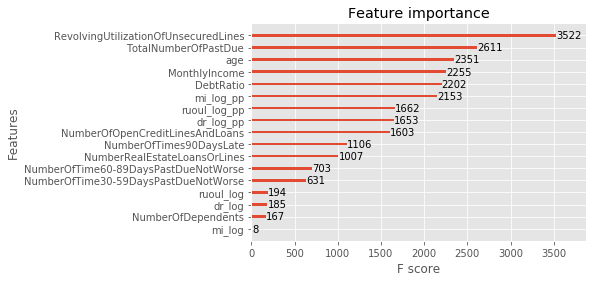

In [6]:
# Plot feature importance
xgb.plot_importance(bst)

In [49]:
## 5-folds cross validation

label  = df.SeriousDlqin2yrs
data   = df.iloc[:,1:]
dtrain = xgb.DMatrix(data, label=label, nthread=8)
param = {'max_depth':3,
         'gamma':0.1,
         'eta':0.005, 
         'subsample':0.5,
         'objective':'binary:logistic'}

ratio = float(np.sum(label==0)) / np.sum(label==1)
param['scale_pos_weight'] = ratio

num_round = 2000

start = time.time()
results = xgb.cv(param, dtrain, num_round, 
                 nfold=5, metrics='auc', 
                 seed=0, verbose_eval=400)
elapsed = time.time() - start
print elapsed/60, "mins"

[0]	train-auc:0.84211+0.00202376	test-auc:0.840587+0.00507469
[400]	train-auc:0.861833+0.00124243	test-auc:0.859858+0.00526689
[800]	train-auc:0.867653+0.00130579	test-auc:0.864473+0.00513738
[1200]	train-auc:0.870981+0.00133023	test-auc:0.866561+0.0051692
[1600]	train-auc:0.873196+0.00134478	test-auc:0.867388+0.00524847
[1999]	train-auc:0.874983+0.00135849	test-auc:0.867723+0.00529894
6.41713320017 mins


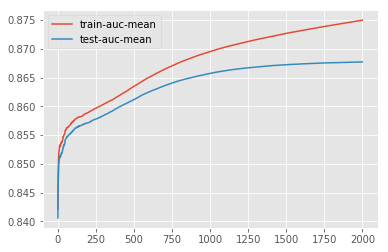

In [50]:
# auc vs. number_round
results[["train-auc-mean", "test-auc-mean"]].plot()

In [51]:
## hyperparameter tuning

params_grid = {
        'subsample': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'max_depth': [3, 4, 5]
        }

xgbc = XGBClassifier(learning_rate=0.005, 
                    n_estimators=2000, 
                    objective='binary:logistic')

skf = StratifiedKFold(n_splits=4, 
                      shuffle=True,
                      random_state=99)

random_search = dcv.RandomizedSearchCV(xgbc, 
                                   param_distributions=params_grid, 
                                   n_iter=10, 
                                   scoring='roc_auc', 
                                   cv=skf.split(data,label),
                                   n_jobs=8,
                                   random_state=99)

with ProgressBar():
    random_search.fit(data, label)

[########################################] | 100% Completed | 32min  9.7s


In [52]:
# Best model
print"Best score:", random_search.best_score_
print"Best classifier:\n", random_search.best_estimator_

Best score: 0.8682085784789906
Best classifier:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.005,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)


### Conclusions

- Developed a robust model to evaluate the risk of a customer default, by using advanced gradient boosting algorithm. 
- Obtained a high predictive accuracy (AUC = 0.868), reaching the top of kaggle leader board.
- Feature engineering is crucial to our model performance, some new features (eg. total number of past due) show larger importance.
- Further improvements: Further feature engineering; Try other models (eg. random forest) or ensemble with other models


## display

<img src="feature_importance.png"/>
<table>
<tr>
<td><img src="train_test_curve.png"/></td>
<td><img src="roc.png"/></td>
</tr>
</table>